**EDA - 1  Bike Details**

**Source:-** https://drive.google.com/file/d/1iKy23bMtEQShF_weneRNnYrFmzvpPOI3/view?usp=drive_link

**About - Dataset:-**

The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike
market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for
used bikes.


**Description:-**

The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand
and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for
resale value prediction, market analysis, and understanding buyer preferences.


The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive
view of the second-hand bike market.

**Questions:-**

1) What is the range of selling prices in the dataset?

2) What is the median selling price for bikes in the dataset?

3) What is the most common seller type?

4) How many bikes have driven more than 50,000 kilometers?

5) What is the average km_driven value for each ownership type?

6) What proportion of bikes are from the year 2015 or older?

7) What is the trend of missing values across the dataset?

8) What is the highest ex_showroom_price recorded, and for which bike?

9) What is the total number of bikes listed by each seller type?

10)  What is the relationship between selling_price and km_driven for first-owner bikes?

11) Identify and remove outliers in the km_driven column using the IQR method?

12) Perform a bivariate analysis to visualize the relationship between year and selling_price?

13) What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

14) Which bike names are priced significantly above the average price for their manufacturing year?

15) Develop a correlation matrix for numeric columns and visualize it using a heatmap?


In [ ]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the dataset
df = pd.read_csv('/content/BIKE DETAILS.csv')
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [ ]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [ ]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
# Check data types
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


Text(0.5, 1.0, 'Distribution of Selling Price')

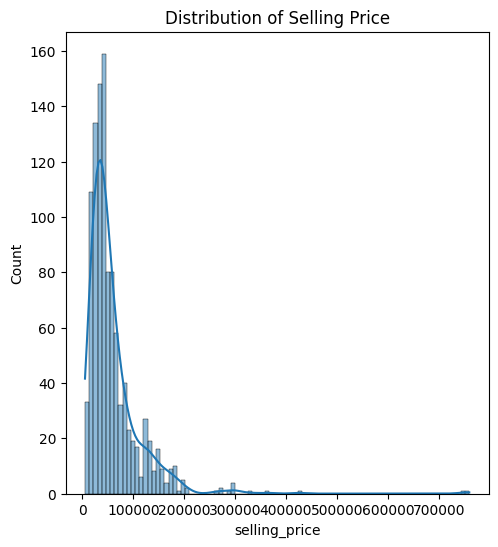

In [ ]:
# Visualizing the distribution of selling price and km_driven
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['selling_price'], kde=True)
plt.title('Distribution of Selling Price')

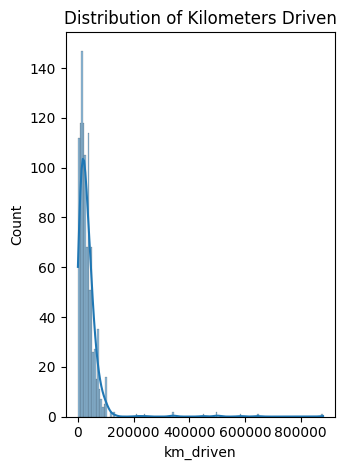

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(df['km_driven'], kde=True)
plt.title('Distribution of Kilometers Driven')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the range of selling prices
selling_price_range = df['selling_price'].max() - df['selling_price'].min()
selling_price_range

755000

In [ ]:
# Calculate the median of the 'selling_price' column
median_selling_price = df['selling_price'].median()
median_selling_price

45000.0

In [ ]:
# Find the most common seller type
most_common_seller_type = df['seller_type'].mode()[0]
most_common_seller_type

'Individual'

In [ ]:
# Filter the bikes with km_driven > 50,000
bikes_driven_more_50k = df[df['km_driven'] > 50000]
bikes_driven_more_50k

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
15,Suzuki Access 125 [2007-2016],25000,2012,Individual,1st owner,55000,58314.0
20,Hero Passion Pro 110,15000,2008,Individual,1st owner,60000,NaN
31,Yamaha FZ S [2012-2016],38000,2013,Individual,1st owner,75000,79432.0
43,Hero Passion XPro,28000,2012,Individual,1st owner,81000,56750.0
...,...,...,...,...,...,...,...
1049,Hero Super Splendor,20000,2007,Individual,1st owner,55000,57000.0
1050,Bajaj Pulsar 150,20000,2010,Individual,1st owner,60000,75000.0
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
# Count the number of such bikes
count_bikes_driven_more_50k = bikes_driven_more_50k.shape[0]
count_bikes_driven_more_50k

170

In [ ]:
# Group the data based on ownership type (owner) and calculate the average km_driven
result = df.groupby('owner')['km_driven'].mean()
result

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [ ]:
# Total number of bikes in the dataset
total_bikes = len(df)

In [ ]:
# Count bikes from the year 2015 or older
bikes_2015_or_older = len(df[df['year'] <= 2015])

In [ ]:
# Calculate the proportion
proportion = bikes_2015_or_older / total_bikes

In [ ]:
# Convert to percentage
percentage = proportion * 100
percentage

56.64467483506126

In [ ]:
print(f"Percentage of bikes from 2015 or older: {percentage:.2f}%")

Percentage of bikes from 2015 or older: 56.64%


In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


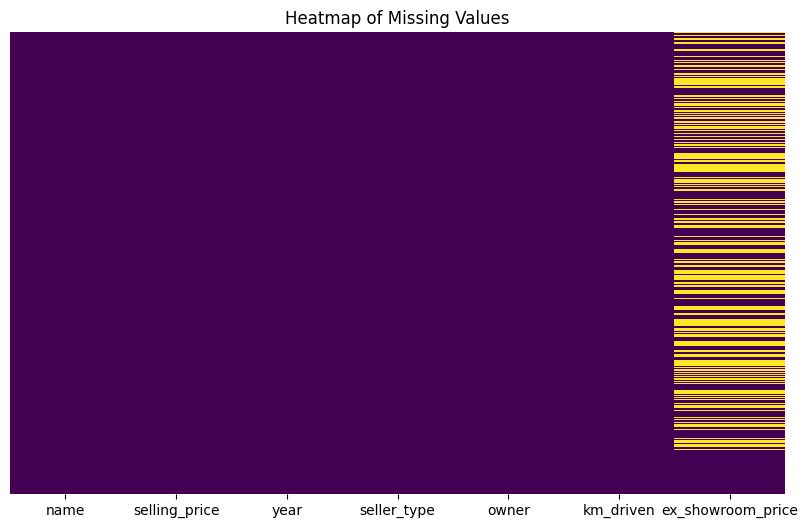

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

In [ ]:
# Drop rows with missing values in the ex_showroom_price column (if not already handled)
df_cleaned = df.dropna(subset=['ex_showroom_price'])
df_cleaned

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
# Find the row with the maximum ex_showroom_price
highest_price_row = df_cleaned.loc[df_cleaned['ex_showroom_price'].idxmax()]
highest_price_row

,134
name,Harley-Davidson Street Bob
selling_price,750000
year,2013
seller_type,Individual
owner,2nd owner
km_driven,12000
ex_showroom_price,1278000.0


In [ ]:
# Display the highest price and the associated bike details
highest_price = highest_price_row['ex_showroom_price']
highest_price

1278000.0

In [ ]:
bike_name = highest_price_row['name']
bike_name

'Harley-Davidson Street Bob'

In [ ]:
# Count the total number of bikes listed by each seller type
seller_type_counts = df['seller_type'].value_counts()
seller_type_counts

,count
seller_type,
Individual,1055
Dealer,6


In [ ]:
# Check if "1st owner" exists in the 'owner' column
print(df['owner'].unique())

['1st owner' '2nd owner' '3rd owner' '4th owner']


In [ ]:
# Filter bikes where the owner is "1st owner"
first_owner_bikes = df[df['owner'] == '1st owner']
first_owner_bikes

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
...,...,...,...,...,...,...,...
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
# Check for missing values in the relevant columns
print(first_owner_bikes[['km_driven', 'selling_price']].isnull().sum())

km_driven        0
selling_price    0
dtype: int64


In [ ]:
# Optional: Filter km_driven to focus on reasonable values
first_owner_bikes = first_owner_bikes[first_owner_bikes['km_driven'] < 100000]
first_owner_bikes

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


<Axes: xlabel='km_driven', ylabel='selling_price'>

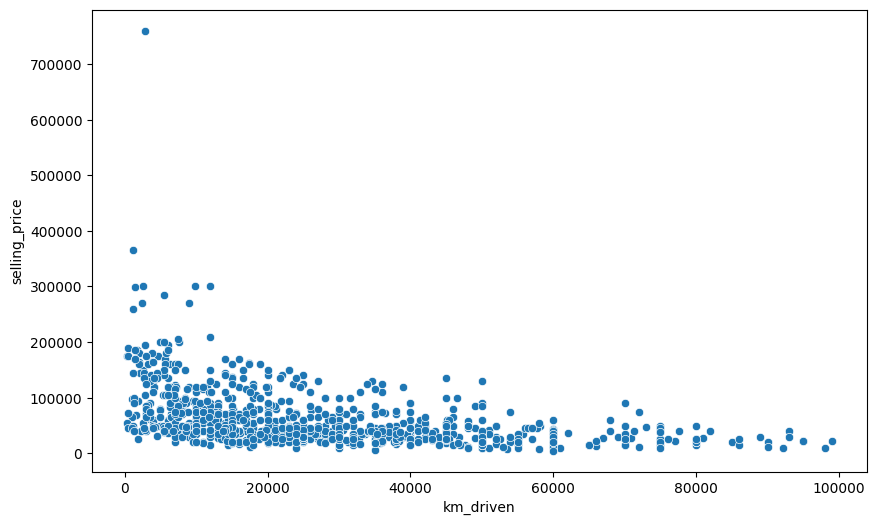

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=first_owner_bikes['km_driven'], y=first_owner_bikes['selling_price'])

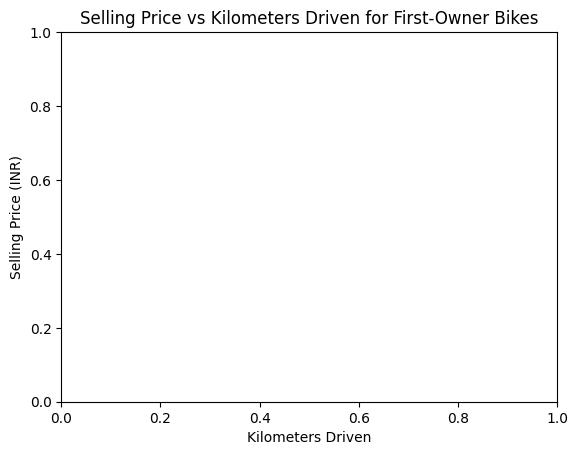

In [ ]:
# Add labels to the plot and show
plt.title('Selling Price vs Kilometers Driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price (INR)')
plt.show()

In [ ]:
# To identify and remove outliers in the km_driven column using the IQR (Interquartile Range) method, follow these steps:

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'km_driven'
Q1 = df['km_driven'].quantile(0.25)
print(Q1)
Q3 = df['km_driven'].quantile(0.75)
print(Q3)

13500.0
43000.0


In [ ]:
# Calculate the IQR
IQR = Q3 - Q1
IQR

29500.0

In [ ]:
# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Filter the dataset to remove outliers in 'km_driven'
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

In [ ]:
# Check the shape before and after removing outliers
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

Original dataset shape: (1061, 7)
Dataset shape after removing outliers: (1022, 7)


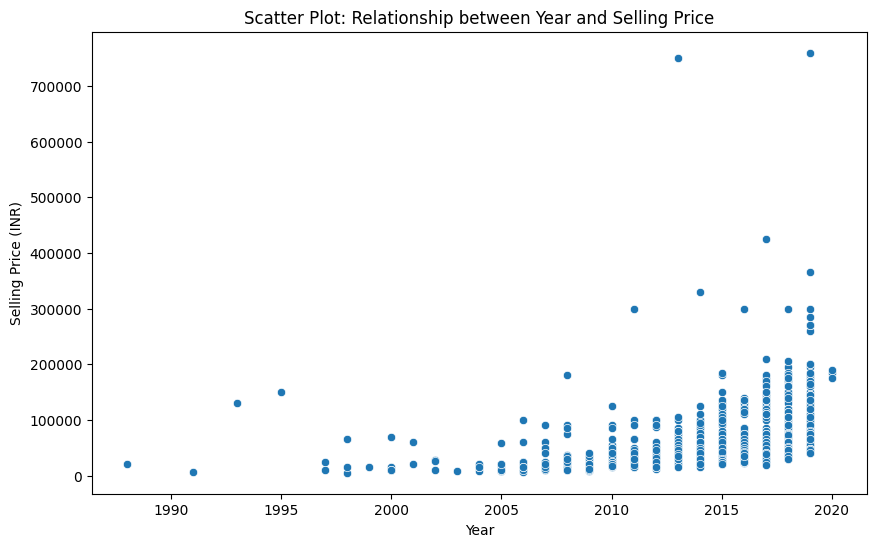

In [ ]:
# Scatter Plot to visualize the relationship between 'year' and 'selling_price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Scatter Plot: Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price (INR)')
plt.show()

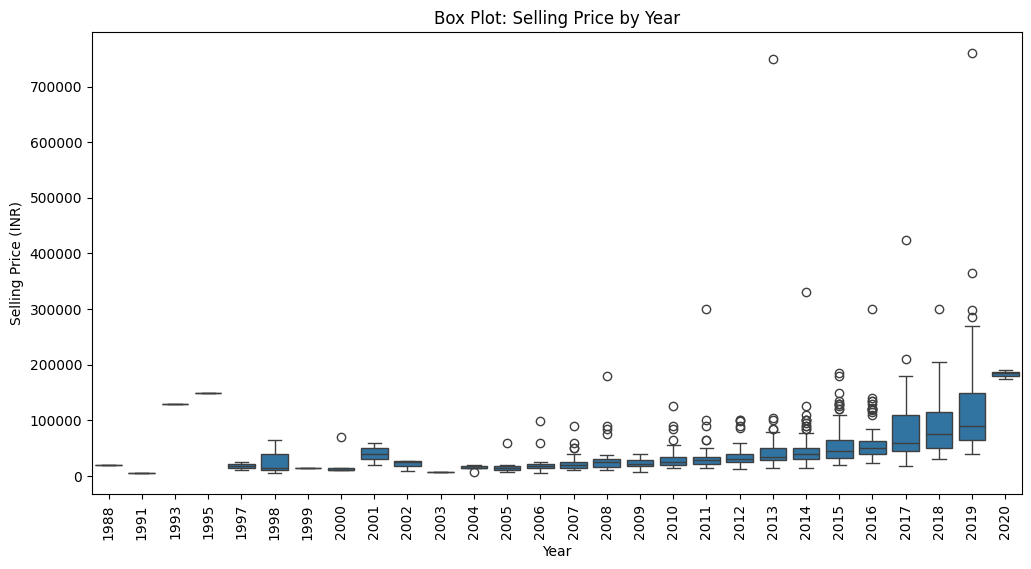

In [ ]:
# Box Plot to visualize the distribution of 'selling_price' by 'year'
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='selling_price', data=df)
plt.title('Box Plot: Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Selling Price (INR)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#To calculate the average depreciation in selling price based on the bike's age (current year - manufacturing year), follow these steps:

In [ ]:
# Current year (for depreciation calculation)
current_year = 2025

# Calculate the age of the bike
df['age'] = current_year - df['year']

In [ ]:
# Calculate depreciation as the difference between ex_showroom_price and selling_price
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']

In [ ]:
# Group by bike age and calculate the average depreciation for each age group
average_depreciation_by_age = df.groupby('age')['depreciation'].mean().reset_index()

In [ ]:
# Display the result
print(average_depreciation_by_age)

    age  depreciation
0     5 -34260.000000
1     6   2954.562500
2     7  13023.194805
3     8  22306.082353
4     9  28328.190476
5    10  28013.275000
6    11  34505.606061
7    12  43086.886792
8    13  37317.648649
9    14  47102.666667
10   15  45658.928571
11   16  38227.785714
12   17  54732.428571
13   18  42399.000000
14   19  39664.500000
15   20  44852.000000
16   21  36852.000000
17   22           NaN
18   23           NaN
19   24  34852.000000
20   25           NaN
21   26           NaN
22   27           NaN
23   28           NaN
24   30           NaN
25   32           NaN
26   34           NaN
27   37           NaN


In [ ]:
# Calculate the average selling price by year
avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()
avg_price_by_year

,year,selling_price
0,1988,20000.000000
1,1991,6000.000000
2,1993,130000.000000
3,1995,150000.000000
4,1997,17500.000000
5,1998,28333.333333
6,1999,15000.000000
7,2000,20833.333333
8,2001,40000.000000
9,2002,20666.666667


In [ ]:
# Rename the column in avg_price_by_year to avoid conflict
avg_price_by_year.rename(columns={'selling_price': 'selling_price_avg'}, inplace=True)
avg_price_by_year

,year,selling_price_avg
0,1988,20000.000000
1,1991,6000.000000
2,1993,130000.000000
3,1995,150000.000000
4,1997,17500.000000
5,1998,28333.333333
6,1999,15000.000000
7,2000,20833.333333
8,2001,40000.000000
9,2002,20666.666667


In [ ]:
# Align the two DataFrames before the merge
df, avg_price_by_year = df.align(avg_price_by_year, join='inner', axis=0)

In [ ]:
# Merge the dataset with the average selling price by year
df = df.merge(avg_price_by_year, on='year', how='left')
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,depreciation,selling_price_avg_x,selling_price_avg_x,selling_price_avg_y,selling_price_avg
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,6,NaN,119689.511628,119689.511628,119689.511628,119689.511628
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,8,NaN,78894.736842,78894.736842,78894.736842,78894.736842
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,7,-1886.0,87660.374046,87660.374046,87660.374046,87660.374046
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,10,24643.0,56500.000000,56500.000000,56500.000000,56500.000000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,14,NaN,35655.721311,35655.721311,35655.721311,35655.721311
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0,15,35857.0,31793.333333,31793.333333,31793.333333,31793.333333
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0,7,9219.0,87660.374046,87660.374046,87660.374046,87660.374046
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN,17,NaN,34289.285714,34289.285714,34289.285714,34289.285714
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN,15,NaN,31793.333333,31793.333333,31793.333333,31793.333333
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0,9,10122.0,58469.018692,58469.018692,58469.018692,58469.018692


In [ ]:
# Define a threshold for significantly above average price (e.g., 1.5 times the average price)
threshold = 1.5

In [ ]:
# Find bikes with selling price significantly above average for their manufacturing year
significantly_above_avg_bikes = df[df['selling_price'] > threshold * df['selling_price_avg']]
significantly_above_avg_bikes

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,depreciation,selling_price_avg_x,selling_price_avg_x,selling_price_avg_y,selling_price_avg
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,7,-1886.0,87660.374046,87660.374046,87660.374046,87660.374046
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN,17,NaN,34289.285714,34289.285714,34289.285714,34289.285714
13,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0,6,-13320.0,119689.511628,119689.511628,119689.511628,119689.511628
18,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,23000,148114.0,7,-1886.0,87660.374046,87660.374046,87660.374046,87660.374046
23,Jawa Standard,180000,2019,Individual,1st owner,2000,NaN,6,NaN,119689.511628,119689.511628,119689.511628,119689.511628
24,Royal Enfield Thunderbird 350,110000,2016,Individual,1st owner,20000,NaN,9,NaN,58469.018692,58469.018692,58469.018692,58469.018692


In [ ]:
# Display the bike names that are priced significantly above the average
print(significantly_above_avg_bikes[['name', 'selling_price', 'year']])

                                    name  selling_price  year
2    Royal Enfield Classic Gunmetal Grey         150000  2018
7   Royal Enfield Bullet 350 [2007-2011]         180000  2008
13                         Yamaha YZF R3         365000  2019
18   Royal Enfield Classic Gunmetal Grey         150000  2018
23                         Jawa Standard         180000  2019
24         Royal Enfield Thunderbird 350         110000  2016


In [ ]:
# To develop and visualize the correlation matrix for numeric columns using a heatmap, you can follow these steps:

In [ ]:
# Select numeric columns from the dataset
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
numeric_columns

,selling_price,year,km_driven,ex_showroom_price,age,depreciation,selling_price_avg_x,selling_price_avg_x,selling_price_avg_y,selling_price_avg
0,175000,2019,350,NaN,6,NaN,119689.511628,119689.511628,119689.511628,119689.511628
1,45000,2017,5650,NaN,8,NaN,78894.736842,78894.736842,78894.736842,78894.736842
2,150000,2018,12000,148114.0,7,-1886.0,87660.374046,87660.374046,87660.374046,87660.374046
3,65000,2015,23000,89643.0,10,24643.0,56500.000000,56500.000000,56500.000000,56500.000000
4,20000,2011,21000,NaN,14,NaN,35655.721311,35655.721311,35655.721311,35655.721311
5,18000,2010,60000,53857.0,15,35857.0,31793.333333,31793.333333,31793.333333,31793.333333
6,78500,2018,17000,87719.0,7,9219.0,87660.374046,87660.374046,87660.374046,87660.374046
7,180000,2008,39000,NaN,17,NaN,34289.285714,34289.285714,34289.285714,34289.285714
8,30000,2010,32000,NaN,15,NaN,31793.333333,31793.333333,31793.333333,31793.333333
9,50000,2016,42000,60122.0,9,10122.0,58469.018692,58469.018692,58469.018692,58469.018692


In [ ]:
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

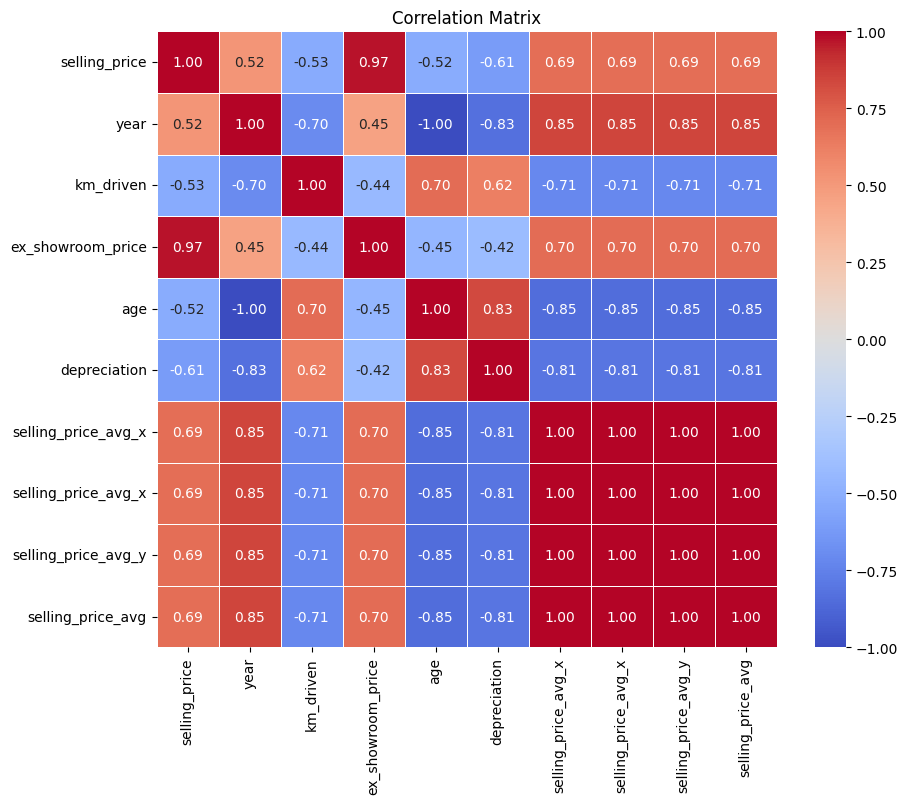

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()